In [61]:
import pandas as pd
import numpy as np
import requests
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve, auc


In [43]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data"
columns = ['Status', 'Duration', 'CreditHistory', 'Purpose', 'CreditAmount', 'Savings', 'EmploymentDuration', 'InstallmentRate', 'PersonalStatus', 'Debtors', 'ResidenceDuration', 'Property', 'Age', 'InstallmentPlans', 'Housing', 'CreditsAtBank', 'Job', 'PeopleLiable', 'Telephone', 'ForeignWorker', 'CreditRisks']
data = pd.read_csv(url, sep=' ', header=None, names=columns)


In [44]:
data.head()

,Status,Duration,CreditHistory,Purpose,CreditAmount,Savings,EmploymentDuration,InstallmentRate,PersonalStatus,Debtors,...,Property,Age,InstallmentPlans,Housing,CreditsAtBank,Job,PeopleLiable,Telephone,ForeignWorker,CreditRisks
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [45]:
data.describe()

,Duration,CreditAmount,InstallmentRate,ResidenceDuration,Age,CreditsAtBank,PeopleLiable,CreditRisks
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


In [46]:
purpose_mapping = {'A40': 'car (new)', 'A41': 'car (used)', 'A42': 'furniture/equipment', 'A43': 'radio/television', 'A44': 'domestic appliances', 'A45': 'repairs', 'A46': 'education', 'A47': '(vacation - does not exist?)', 'A48': 'retraining', 'A49': 'business', 'A410': 'others'}
job_mapping = {'A171': 'unemployed/ unskilled - non-resident', 'A172': 'unskilled - resident', 'A173': 'skilled employee / official', 'A174': 'management/ self-employed/ highly qualified employee/ officer'}
credit_risk_mapping = {1: 'Good', 2: 'Bad'}

In [47]:
data_viz = data.copy()
data_viz['Purpose'] = data_viz['Purpose'].map(purpose_mapping)
data_viz['Job'] = data_viz['Job'].map(job_mapping)
data_viz['CreditRisks'] = data_viz['CreditRisks'].map(credit_risk_mapping)


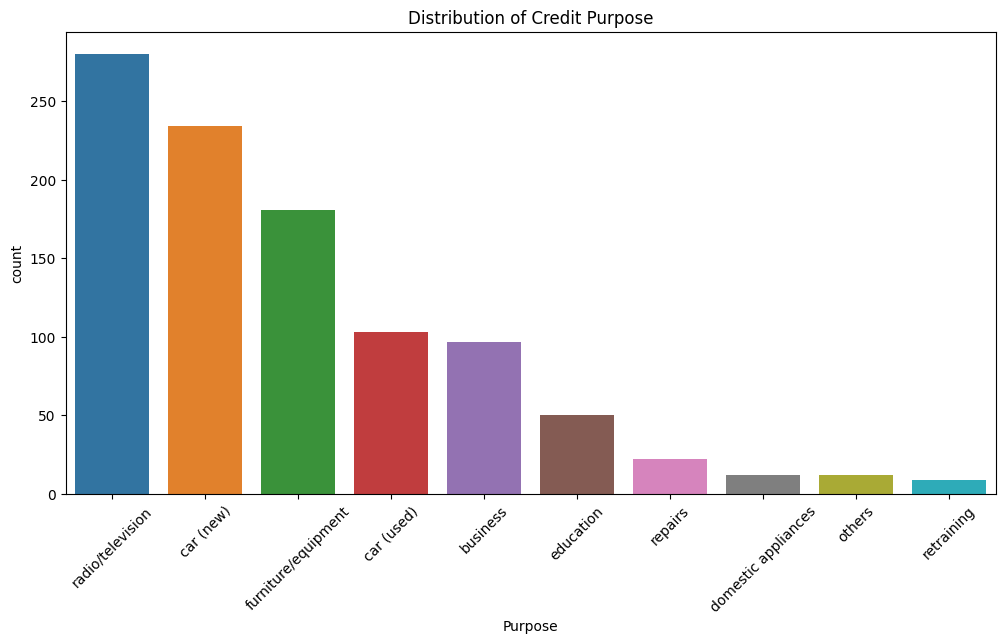

In [48]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data_viz, x='Purpose', order=data_viz['Purpose'].value_counts().index)
plt.title('Distribution of Credit Purpose')
plt.xticks(rotation=45)
plt.show()

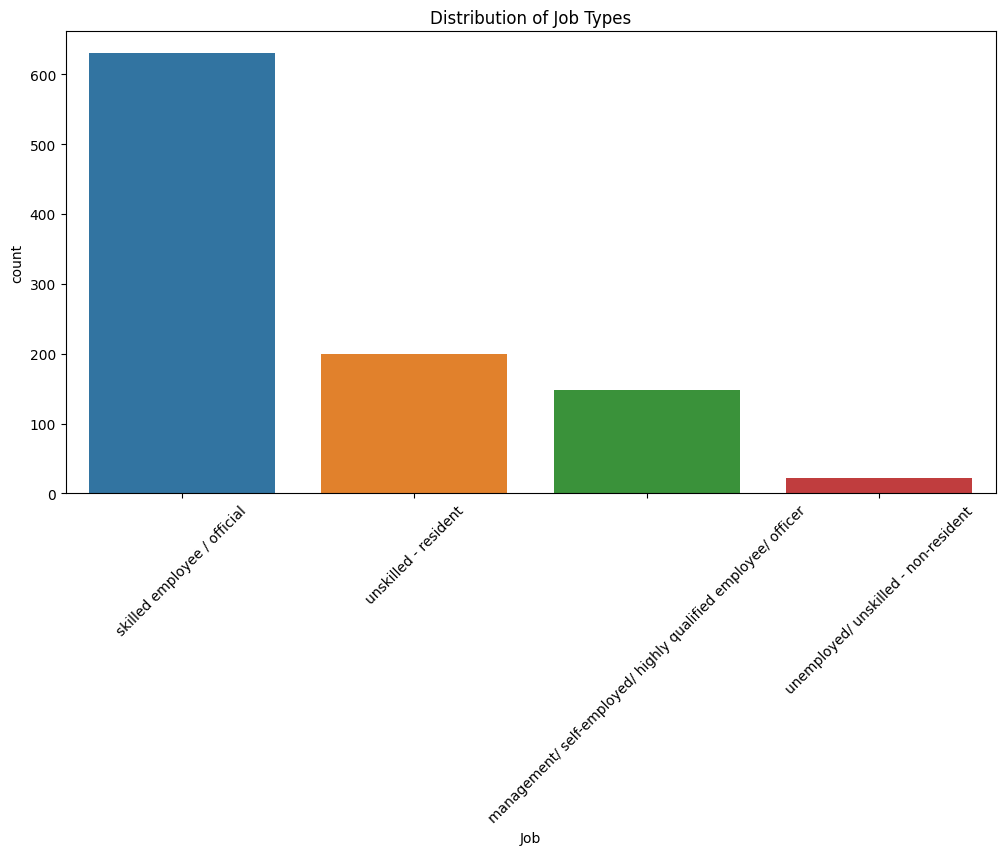

In [49]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data_viz, x='Job', order=data_viz['Job'].value_counts().index)
plt.title('Distribution of Job Types')
plt.xticks(rotation=45)
plt.show()

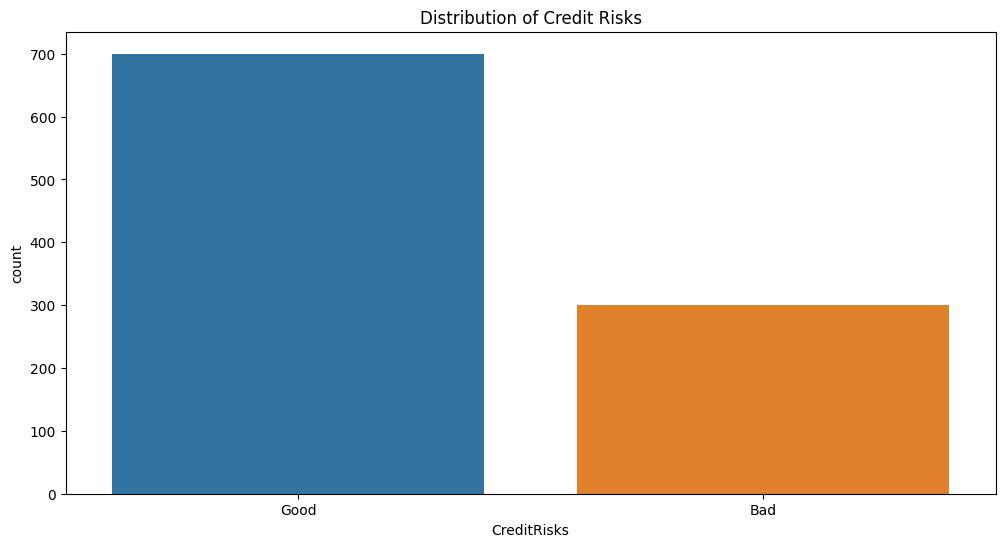

In [50]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data_viz, x='CreditRisks', order=data_viz['CreditRisks'].value_counts().index)
plt.title('Distribution of Credit Risks')
plt.show()

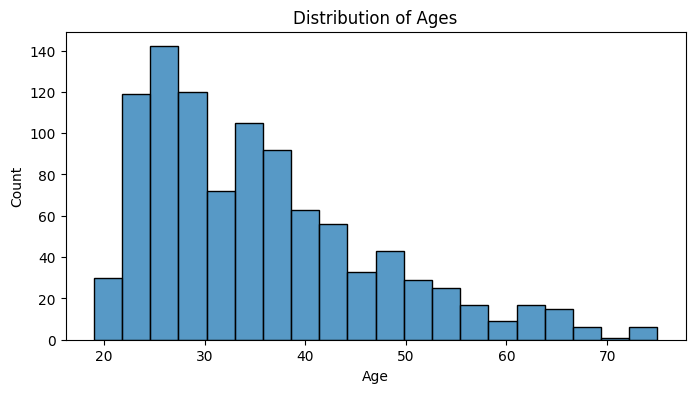

In [51]:
plt.figure(figsize=(8, 4))
sns.histplot(data_viz['Age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Ages')
plt.show()




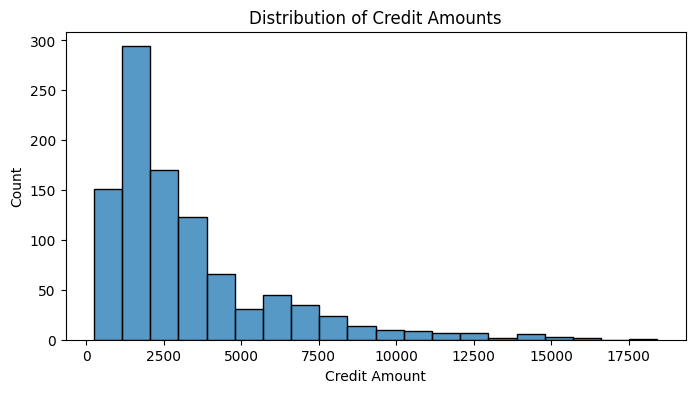

In [52]:
plt.figure(figsize=(8, 4))
sns.histplot(data_viz['CreditAmount'], bins=20)
plt.xlabel('Credit Amount')
plt.ylabel('Count')
plt.title('Distribution of Credit Amounts')
plt.show()


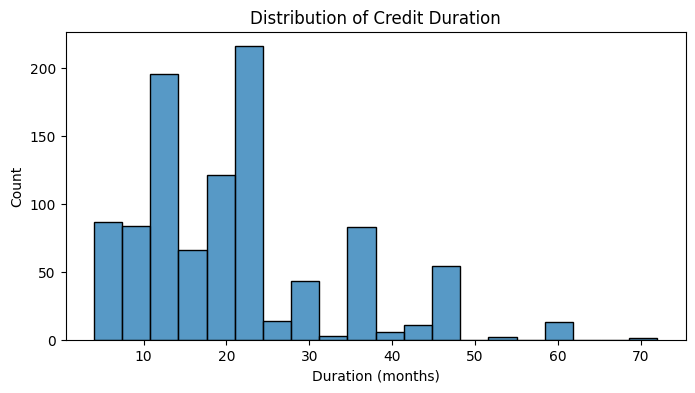

In [53]:
plt.figure(figsize=(8, 4))
sns.histplot(data_viz['Duration'], bins=20)
plt.xlabel('Duration (months)')
plt.ylabel('Count')
plt.title('Distribution of Credit Duration')
plt.show()

In [54]:
data = pd.get_dummies(data, drop_first=True)
X = data.drop('CreditRisks', axis=1)
y = data['CreditRisks']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [58]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [59]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)


LogisticRegression()

In [62]:
y_pred = model.predict(X_test_scaled)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           1       0.84      0.88      0.86       141
           2       0.67      0.59      0.63        59

    accuracy                           0.80       200
   macro avg       0.76      0.74      0.74       200
weighted avg       0.79      0.80      0.79       200



In [63]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[124  17]
 [ 24  35]]


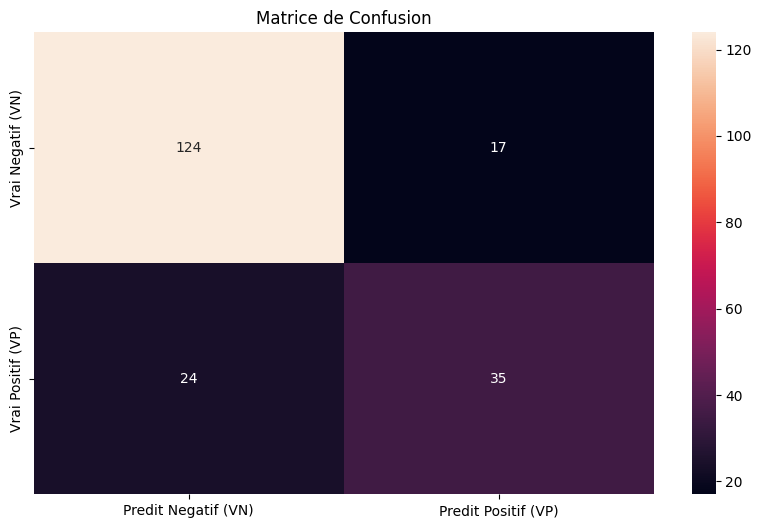

In [67]:
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=['Vrai Negatif (VN)', 'Vrai Positif (VP)'], columns=['Predit Negatif (VN)', 'Predit Positif (VP)'])
plt.figure(figsize=(10,6))
sns.heatmap(cm_df, annot=True, fmt='g')
plt.title('Matrice de Confusion')
plt.show()

In [68]:
print("ROC AUC Score:")
print(roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1]))

ROC AUC Score:
0.8208919341266978


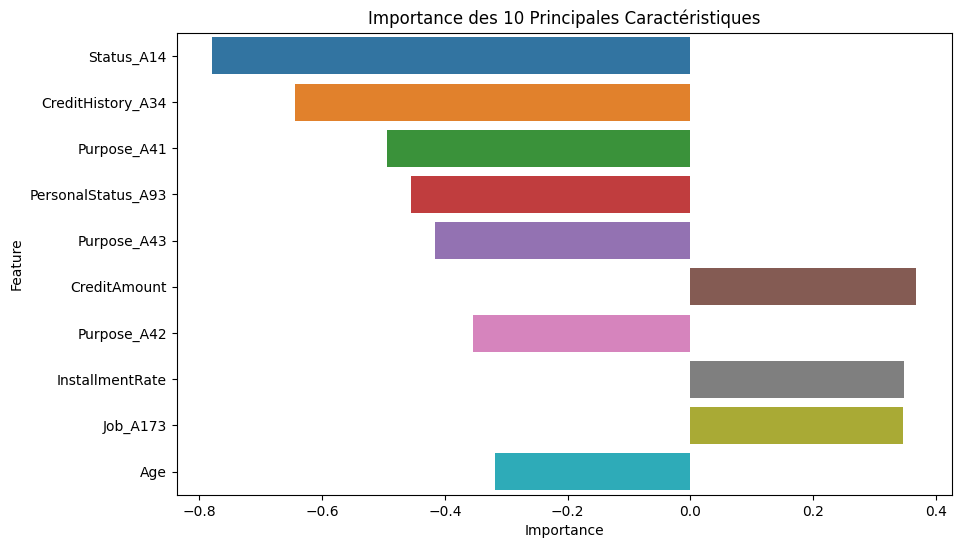

In [70]:
importances = model.coef_[0]
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.reindex(importance_df.Importance.abs().sort_values(ascending=False).index)
top_features = importance_df.head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_features)
plt.title('Importance des 10 Principales Caractéristiques')
plt.show()
